In [1]:
import pandas as pd
import  numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# LINEAR DISCRIMINANT ANALYSE

In [2]:
path = r"C:\Users\Utilisateur\Desktop\Projet_interpromo_2k22\ProjectInterPromo\data\Donnees_v1.csv"

In [3]:
data = pd.read_csv(path)


In [5]:
quali_col = []
count = 0
for i, name in zip(data.dtypes, data.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data.drop(columns=quali_col + ["Unnamed: 0"])


In [8]:
'''
solvers : {‘svd’, ‘lsqr’, ‘eigen’}


'''
df = data_quanti.sample(100000)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [27]:
X , Y = df.drop(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT'],1) , df['TOP_FRAUDE']

In [42]:
clf = LinearDiscriminantAnalysis()
clf.fit(X , Y)

LinearDiscriminantAnalysis()

In [61]:
coefficients = clf.coef_
#plt.plot(clf.xbar_)
# EQM
X_test = data_quanti.sample(50000)
Y_test = X_test['TOP_FRAUDE']
X_test = X_test.drop(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT'],1) 


In [62]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
# evaluation
from sklearn.metrics import precision_recall_curve, auc
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    print(f'l''aire sous la courbe{value}')
    print(f'le f1_score est{f1_score}')
    print(f'la precision est{precision}')
    print(f'le recall est{recall}')
    return value, f1_score, precision, recall


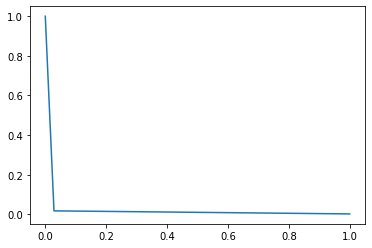

laire sous la courbe{value}
le f1_score est[0.0041912  0.02173913 0.        ]
la precision est[0.0021     0.01754386 1.        ]
le recall est[1.         0.02857143 0.        ]


(0.02407764411027569,
 array([0.0041912 , 0.02173913, 0.        ]),
 array([0.0021    , 0.01754386, 1.        ]),
 array([1.        , 0.02857143, 0.        ]))

In [66]:
evaluation(clf.predict(X_test) , Y_test, True)

In [179]:
importances = clf.coef_


In [180]:
importances = importances.reshape(393 , 1)

d = dict(zip(data_quanti.columns , importances))
d_tri = sorted(d.items(), key=lambda t: np.abs(t[1]))
d_tri[-1][0]

'seg_nature_potentiel_HDG DYNAMIQUE'

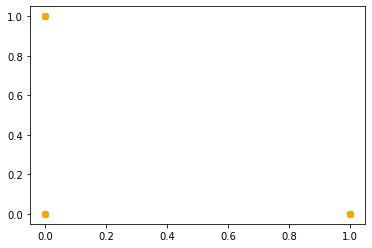

In [182]:
plt.scatter(data_quanti[data_quanti["TOP_FRAUDE"]==0][d_tri[-1][0]], data_quanti[data_quanti["TOP_FRAUDE"]==0][d_tri[-2][0]], alpha=0.2, c="orange", label="Not Fraude")
#plt.scatter(data_quanti[data_quanti["TOP_FRAUDE"]==1][d_tri[-1][0]], data_quanti[data_quanti["TOP_FRAUDE"]==1][d_tri[-2][0]], alpha=0.7, c="blue", label="Fraude")
#plt.legend()
plt.show()

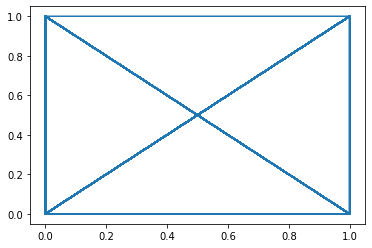

In [148]:
plt.plot(data_quanti[d_tri[-1][0]] , data_quanti['TOP_FRAUDE'])
plt.savefig

In [160]:
a = np.sum(data_quanti[d_tri[-1][0]]) / len(data_quanti[d_tri[-1][0]])

b= np.sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti["TOP_FRAUDE"])

print(f'le taux de la variable la plus pertinente est {a} tandis que le taux fraude est {b}')

le taux de la variable la plus pertinente est 0.018876587568812307 tandis que le taux fraude est 0.0019189745376801835


# Fonction LDA:

In [201]:
def LDA (df, 
         column_fraude,
        alpha #list(alpha0 , alpha1)
        ):
    # enlever les variables qualitatives.
    quali_col = []
    for i, name in zip(df.dtypes, df.columns):
        if i == "object":
            quali_col.append(name)

    data_quanti = df.drop(columns=quali_col)
    X , Y = data_quanti.drop(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT'],1) , column_fraude
    clf = LinearDiscriminantAnalysis()
    clf.fit(X , Y)
    importances = clf.coef_
    importances = importances.reshape(len(X.columns) , 1)

    d = dict(zip(data_quanti.columns , importances))
    d_tri = sorted(d.items(), key=lambda t: np.abs(t[1]))
    
    plt.scatter(data_quanti[data_quanti["TOP_FRAUDE"]==0][d_tri[-1][0]], data_quanti[data_quanti["TOP_FRAUDE"]==0][d_tri[-2][0]], alpha=alpha[0], c="orange", label="Not Fraude")
    plt.scatter(data_quanti[data_quanti["TOP_FRAUDE"]==1][d_tri[-1][0]], data_quanti[data_quanti["TOP_FRAUDE"]==1][d_tri[-2][0]], alpha=alpha[1], c="blue", label="Fraude")
    plt.legend()
    plt.title('Fraudes sur les 2 meilleurs axes')
    plt.show()
    print(f'Les variables 10 variables les plus importantes sont {d_tri[-10:]}')

# TSNE:

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
from sklearn.manifold import TSNE
df.columns

Index(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT', 'TOP_E_RELEVE',
       'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE', 'FIAB_TEL_TRAVAIL',
       'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA',
       ...
       'SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV',
       'SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP',
       'SECTEUR_GESTION_SECTEUR NARBONNE', 'SECTEUR_GESTION_SECTEUR NIMES',
       'SECTEUR_GESTION_SECTEUR NORD', 'SECTEUR_GESTION_SECTEUR OUEST',
       'SECTEUR_GESTION_SECTEUR SUD', 'SECTEUR_GESTION_SECTEUR THAU LITTORAL',
       'SECTEUR_GESTION_SECTEUR VALLEE DU RHONE',
       'SECTEUR_GESTION_SVCES SIEGES BR RESEAUX'],
      dtype='object', length=396)

In [15]:
X =df.drop(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT'], 1)
Y = df['TOP_FRAUDE']

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.053s...
[t-SNE] Computed neighbors for 100000 samples in 469.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

[Text(0.5, 1.0, 'Données V1 T-SNE projection')]

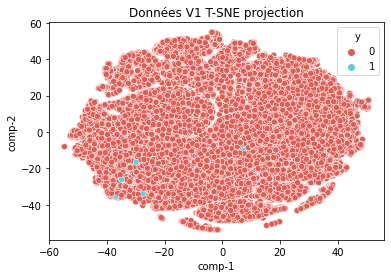

In [19]:
resultat = pd.DataFrame()
resultat["y"] = Y
resultat["comp-1"] = z[:,0]
resultat["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=resultat["y"],
                palette=sns.color_palette("hls", 2),
                data=resultat).set(title="Données V1 T-SNE projection") 

In [ ]:
def T_SNE(
    df,
    column_fraude,
    
)